# World Database on Protected Areas (WDPA) - Central America Analysis

This notebook contains preliminary analysis of protected land areas in Central American countries using the World Database on Protected Areas (WDPA) datasets.

## References
UNEP-WCMC and IUCN (2025), Protected Planet: 
The World Database on Protected Areas (WDPA) [On-line], November 2025,
Cambridge, UK: UNEP-WCMC and IUCN. Available at: [www.protectedplanet.net.](http://www.protectedplanet.net)

UNEP-WCMC (2019). User Manual for the World Database on Protected Areas and world database on other
effective area-based conservation measures: 1.6. UNEP-WCMC: Cambridge, UK. Available at:
[http://wcmc.io/WDPA_Manual](http://wcmc.io/WDPA_Manual)

In [6]:
%pwd

'/Users/aradams/EDS-220/EDS220-weekly-discussions/section-6'

In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:

pd.set_option('display.max_columns', None)

# ------ IMPORT DATASETS ------
# WDPA loading takes ~5 minutes. Only run this cell when needed.

data_folder = os.path.join('data', 'WDPA_Nov2025_Public_shp')

fp = os.path.join(data_folder, 'WDPA_Nov2025_Public_shp_0', 'WDPA_Nov2025_Public_shp-polygons.shp')
wdpa0 = gpd.read_file(fp)

fp = os.path.join(data_folder, 'WDPA_Nov2025_Public_shp_1', 'WDPA_Nov2025_Public_shp-polygons.shp')
wdpa1 = gpd.read_file(fp)

fp = os.path.join(data_folder, 'WDPA_Nov2025_Public_shp_2', 'WDPA_Nov2025_Public_shp-polygons.shp')
wdpa2 = gpd.read_file(fp)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds220-env/share/proj failed


In [3]:
# Standardize column names to lowercase
wdpa0.columns = wdpa0.columns.str.lower()
wdpa1.columns = wdpa1.columns.str.lower()
wdpa2.columns = wdpa2.columns.str.lower()

In [4]:
# Central American countries and their land areas (sq. km) (source: Wikipedia, November 5, 2025)
central_america_areas = pd.DataFrame({
    "country": [
        "Belize", "Costa Rica", "El Salvador",
        "Guatemala", "Honduras", "Nicaragua", "Panama"
    ],
    "iso3": ["BLZ", "CRI", "SLV", "GTM", "HND", "NIC", "PAN"],
    "area_sqkm": [
        22966, 51180, 21041,
        108889, 112492, 130375, 75417
    ]
})

print(central_america_areas)


       country iso3  area_sqkm
0       Belize  BLZ      22966
1   Costa Rica  CRI      51180
2  El Salvador  SLV      21041
3    Guatemala  GTM     108889
4     Honduras  HND     112492
5    Nicaragua  NIC     130375
6       Panama  PAN      75417


In [ ]:
# Calculate total protected land area for each Central American country from WDPA datasets

# Belize
area0 = wdpa0.loc[wdpa0["iso3"] == "BLZ", "rep_area"].sum()
area1 = wdpa1.loc[wdpa1["iso3"] == "BLZ", "rep_area"].sum()
area2 = wdpa2.loc[wdpa2["iso3"] == "BLZ", "rep_area"].sum()
total_area_blz = area0 + area1 + area2
print(f"Total protected land area in Belize (sq. km): {total_area_blz:,.2f}")

# Costa Rica
area0 = wdpa0.loc[wdpa0["iso3"] == "CRI", "rep_area"].sum()
area1 = wdpa1.loc[wdpa1["iso3"] == "CRI", "rep_area"].sum()
area2 = wdpa2.loc[wdpa2["iso3"] == "CRI", "rep_area"].sum()
total_area_cri = area0 + area1 + area2
print(f"Total protected land area in Costa Rica (sq. km): {total_area_cri:,.2f}")

# El Salvador
area0 = wdpa0.loc[wdpa0["iso3"] == "SLV", "rep_area"].sum()
area1 = wdpa1.loc[wdpa1["iso3"] == "SLV", "rep_area"].sum()
area2 = wdpa2.loc[wdpa2["iso3"] == "SLV", "rep_area"].sum()
total_area_slv = area0 + area1 + area2
print(f"Total protected land area in El Salvador (sq. km): {total_area_slv:,.2f}")

# Guatemala
area0 = wdpa0.loc[wdpa0["iso3"] == "GTM", "rep_area"].sum()
area1 = wdpa1.loc[wdpa1["iso3"] == "GTM", "rep_area"].sum()
area2 = wdpa2.loc[wdpa2["iso3"] == "GTM", "rep_area"].sum()
total_area_gtm = area0 + area1 + area2
print(f"Total protected land area in Guatemala (sq. km): {total_area_gtm:,.2f}")

# Honduras
area0 = wdpa0.loc[wdpa0["iso3"] == "HND", "rep_area"].sum()
area1 = wdpa1.loc[wdpa1["iso3"] == "HND", "rep_area"].sum()
area2 = wdpa2.loc[wdpa2["iso3"] == "HND", "rep_area"].sum()
total_area_hnd = area0 + area1 + area2
print(f"Total protected land area in Honduras (sq. km): {total_area_hnd:,.2f}")

# Nicaragua
area0 = wdpa0.loc[wdpa0["iso3"] == "NIC", "rep_area"].sum()
area1 = wdpa1.loc[wdpa1["iso3"] == "NIC", "rep_area"].sum()
area2 = wdpa2.loc[wdpa2["iso3"] == "NIC", "rep_area"].sum()
total_area_nic = area0 + area1 + area2
print(f"Total protected land area in Nicaragua (sq. km): {total_area_nic:,.2f}")

# Panama
area0 = wdpa0.loc[wdpa0["iso3"] == "PAN", "rep_area"].sum()
area1 = wdpa1.loc[wdpa1["iso3"] == "PAN", "rep_area"].sum()
area2 = wdpa2.loc[wdpa2["iso3"] == "PAN", "rep_area"].sum()
total_area_pan = area0 + area1 + area2
print(f"Total protected land area in Panama (sq. km): {total_area_pan:,.2f}")


### Solution: Method 1

In [5]:
wdpa = pd.concat([wdpa0,wdpa1, wdpa2])

for i in wdpa.columns:
    i = wdpa0.columns.str.lower()

    countries_area = ["BLZ", "CRI", "SLV", "GTM","HND", "NIC", "PAN"]

for i in countries_area: 
    area = wdpa.loc[wdpa["iso3"] == i, "rep_area"].sum()
    print(f"Total protected land area in {i} is {area:,.2f}")
    pct_protected = (area/(central_america_areas.loc[central_america_areas["iso3"] == i, "area_sqkm"].item()))*100
    print(f"Percentage of protected land area in {i}: {pct_protected:.2f}%\n")


Total protected land area in BLZ is 10,181.87
Percentage of protected land area in BLZ: 44.33%

Total protected land area in CRI is 89,594.36
Percentage of protected land area in CRI: 175.06%

Total protected land area in SLV is 5,701.12
Percentage of protected land area in SLV: 27.10%

Total protected land area in GTM is 40,316.17
Percentage of protected land area in GTM: 37.03%

Total protected land area in HND is 96,103.89
Percentage of protected land area in HND: 85.43%

Total protected land area in NIC is 84,985.39
Percentage of protected land area in NIC: 65.19%

Total protected land area in PAN is 133,553.40
Percentage of protected land area in PAN: 177.09%



### Solution Method 2

In [15]:
df = [wdpa0,wdpa1, wdpa2]
countries_area = ["BLZ", "CRI", "SLV", "GTM","HND", "NIC", "PAN"]

# loop over the 3 different dataframes
for j in df:
    j.columns = j.columns.str.lower() # convert column names to lower case

# loop over countries defined above
for k in countries_area:
        #initialize total area as 0 for each county
        total_area = 0
        # pick dataframe
        for j in df:
            # area = sum of of rep_area for the country we are iterating over
            area = j.loc[j["iso3"] == k, "rep_area"].sum()
            # add areas from all three dataframes
            total_area += area
        
        print(f"Total protected land area in {k} is {total_area:,.2f}")
        # Calculate percent protected area
        pct_protected = (total_area/(central_america_areas.loc[central_america_areas["iso3"] == k, "area_sqkm"].item()))*100
        print(f"Percentage of protected land area in {k}: {pct_protected:.2f}%\n")


Total protected land area in BLZ is 10,181.87
Percentage of protected land area in BLZ: 44.33%

Total protected land area in CRI is 89,594.36
Percentage of protected land area in CRI: 175.06%

Total protected land area in SLV is 5,701.12
Percentage of protected land area in SLV: 27.10%

Total protected land area in GTM is 40,316.17
Percentage of protected land area in GTM: 37.03%

Total protected land area in HND is 96,103.89
Percentage of protected land area in HND: 85.43%

Total protected land area in NIC is 84,985.39
Percentage of protected land area in NIC: 65.19%

Total protected land area in PAN is 133,553.40
Percentage of protected land area in PAN: 177.09%



#### Exercise 1 from Tuesday class 


In [48]:
# Import states data
fp = os.path.join('data','tl_2023_us_state','tl_2023_us_state.shp')
states = gpd.read_file(fp)

# Simplify column names 
states.columns = states.columns.str.lower()
ca_boundary = states.loc[states["name"] == "California"]

In [2]:
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)

# Simpify column names
power_plants.columns = power_plants.columns.str.lower()

# Drop first column
power_plants = power_plants.drop(columns='unnamed: 0')

In [3]:
# Create points from latitude and longitude
points = gpd.points_from_xy(power_plants.longitude, 
                            power_plants.latitude)

# Create geodataframe
power_plants = gpd.GeoDataFrame(power_plants,    # Data
                                geometry=points, # Specify geometry column
                                crs='EPSG:4269'  # Specify CRS
                                )



In [14]:
ca_power_plants = power_plants[power_plants['state'] == 'California']
top_sources = ca_power_plants['primsource'].value_counts().head(3).index.tolist()
top_sources

['solar', 'natural gas', 'hydroelectric']

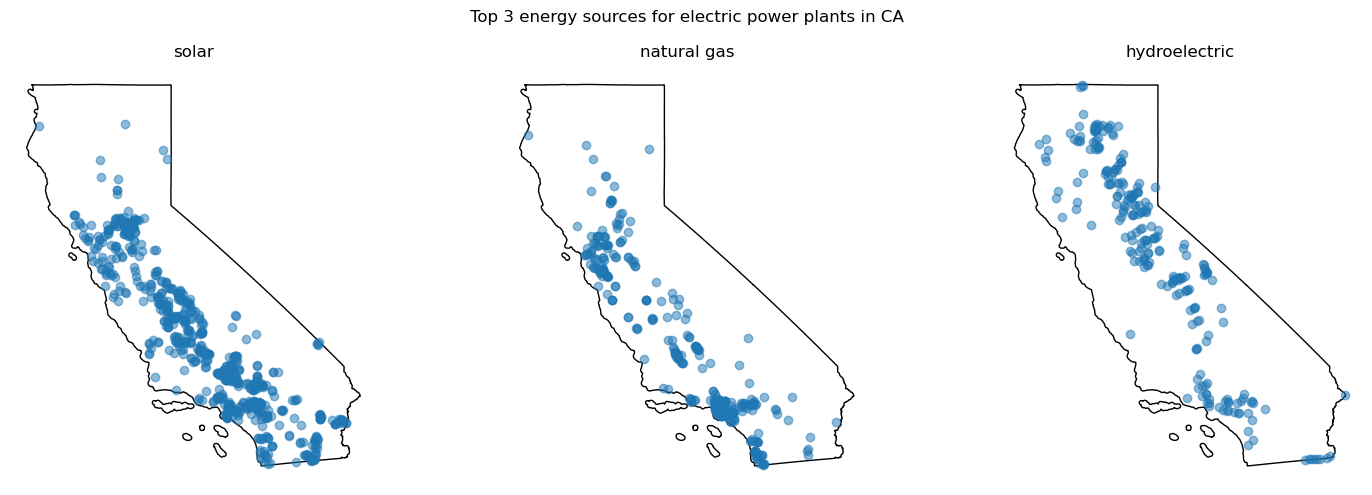

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

fig.suptitle("Top 3 energy sources for electric power plants in CA")

for ax, source in zip(axes, top_sources):
    # Plot California boundary
    ca_boundary.plot(ax=ax,facecolor='none' , edgecolor = "black")
    
    # Filter and plot power plants for this source
    source_plants = ca_power_plants[ca_power_plants['primsource'] == source]
    source_plants.plot(ax=ax, alpha = 0.5)
    
    # Format the subplot
    ax.set_title(f'{source}', fontsize=12)
    ax.set_axis_off()
    
plt.tight_layout()
plt.show()

## Exercise # 2

In [52]:
state_power_plants = power_plants[power_plants['state'] == 'California']
top_sources = ca_power_plants['primsource'].value_counts().head(3).index.tolist()
top_sources

states_list = ["California", "Nevada"]

states_boundary = states[states['name'].isin(states_list)]


states_power_plants = power_plants[power_plants['state'] == 'California']
top_sources = ca_power_plants['primsource'].value_counts().head(3).index.tolist()
top_sources

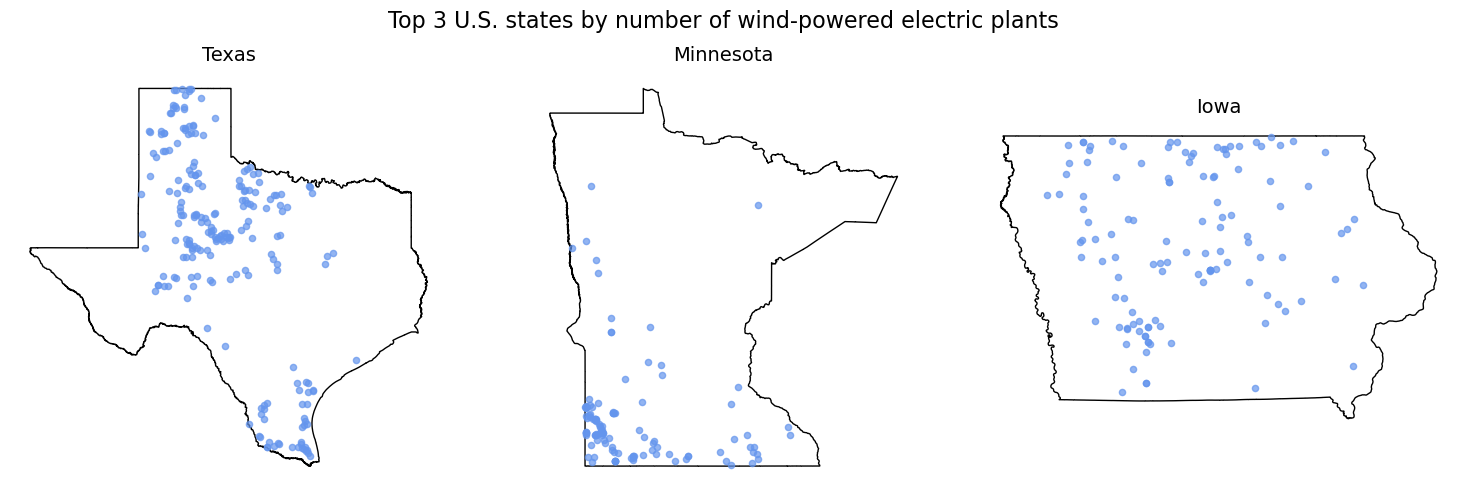

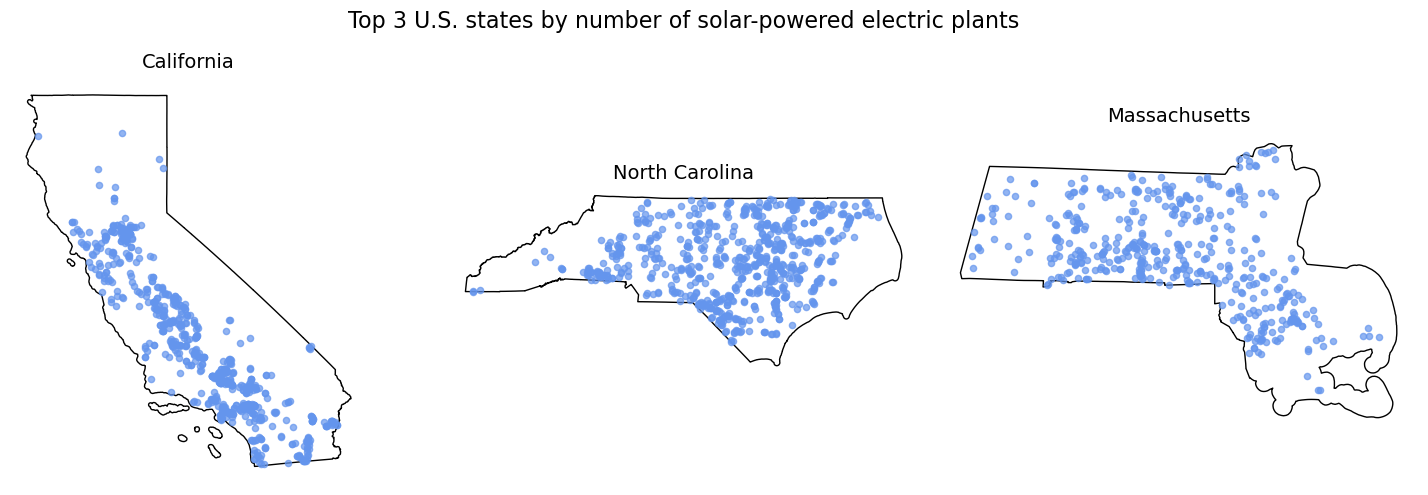

In [59]:
def plot_top_states_by_source(power_source, n=3):
    
    # Filter for the specified power source
    source_plants = power_plants[power_plants['primsource'] == power_source]
    
    # Get top n states
    top_states = source_plants['state'].value_counts().head(n).index.tolist()
    
    # Create subplots
    fig, axes = plt.subplots(1, n, figsize=(5*n, 5))
    fig.suptitle(f'Top {n} U.S. states by number of {power_source}-powered electric plants', 
                 fontsize=16, y=0.98)
    
    
    for ax, state in zip(axes, top_states):
        # Get state boundary and name
        state_boundary = states[states['name'] == state]
        state_name = state_boundary['name'].values[0]
        
        # Plot state boundary
        state_boundary.plot(ax=ax, facecolor='none', edgecolor='black')
        
        # Filter and plot plants for this state
        state_plants = source_plants[source_plants['state'] == state]
        state_plants.plot(ax=ax, color='cornflowerblue', markersize=20, alpha=0.7)
        
        # Format subplot
        ax.set_title(state_name, fontsize=14)
        ax.set_axis_off()
    
    plt.tight_layout()
    plt.show()

# Use the function
plot_top_states_by_source('wind')
plot_top_states_by_source('solar')